In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
data = pd.read_csv('heart.csv')

In [5]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [8]:
from sklearn.model_selection import train_test_split

X,y = data.drop('target', axis = 1), data['target']
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2)


## Scale-Insensitive

In [22]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

In [12]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_clf.fit(x_train, y_train)

GradientBoostingClassifier()

## Scale-Sensitive

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train_scaled, y_train)

LogisticRegression()

In [20]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train_scaled, y_train)

SVC()

In [23]:
forest.score(x_test,y_test)

0.9772727272727273

In [24]:
gnb.score(x_test,y_test)

0.8409090909090909

In [25]:
gb_clf.score(x_test,y_test)

0.9545454545454546

In [29]:
knn.score(x_test_scaled,y_test)

0.8311688311688312

In [30]:
gb_clf.score(x_test_scaled,y_test)

c:\Users\21268\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


0.5811688311688312

In [31]:
gb_clf.score(x_test_scaled,y_test)

c:\Users\21268\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


0.5811688311688312

In [ ]:
from sklearn.metrics import recall_score, confusion_matrix, ConfusionMatrixDisplay


models_unscaled = [forest, gnb, gb_clf]
models_scaled = [knn, lr, svc]

for model in models_unscaled:
  y_pred = model.predict(x_test)
  print(f"For the model {(model)} ")
  print(f"The recall is {recall_score(y_test, y_pred)}")



For the model RandomForestClassifier() 
The recall is 0.9791666666666666
For the model GaussianNB() 
The recall is 0.8958333333333334
For the model GradientBoostingClassifier() 
The recall is 0.9513888888888888


In [35]:
for model in models_unscaled:
  y_pred = model.predict(x_test_scaled)
  print(f"For the model {(model)} ")
  print(f"The recall is {recall_score(y_test, y_pred)}")

For the model RandomForestClassifier() 
The recall is 0.9652777777777778
For the model GaussianNB() 
The recall is 0.18055555555555555
For the model GradientBoostingClassifier() 
The recall is 0.2013888888888889


c:\Users\21268\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\21268\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\21268\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


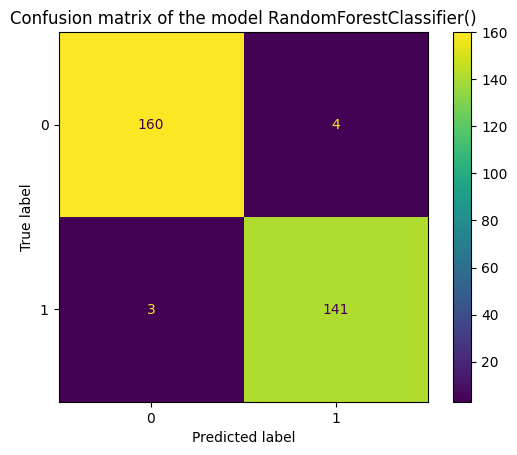

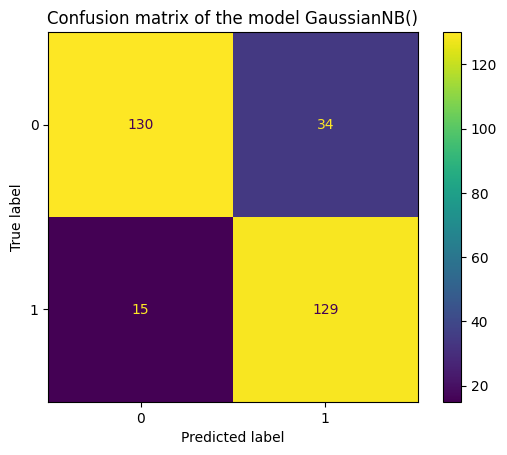

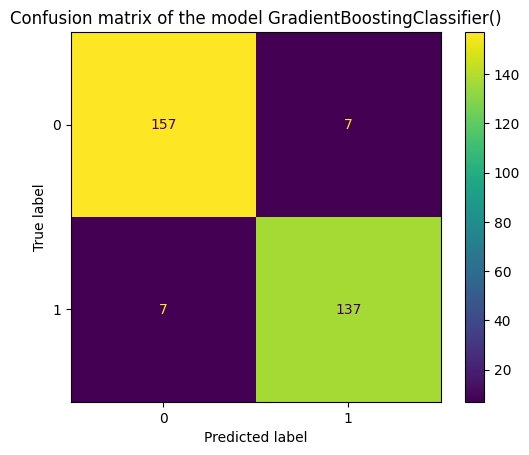

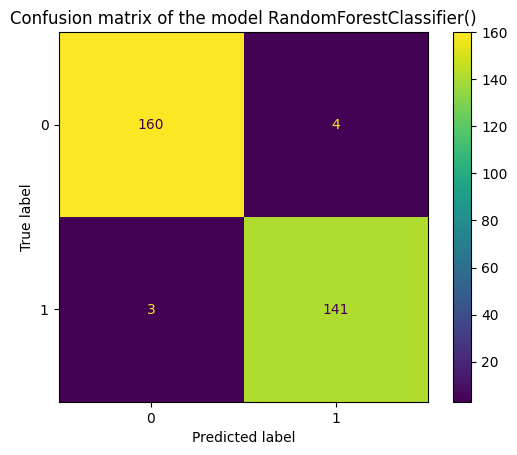

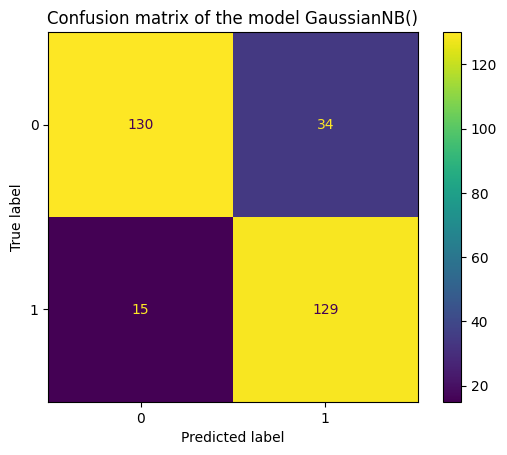

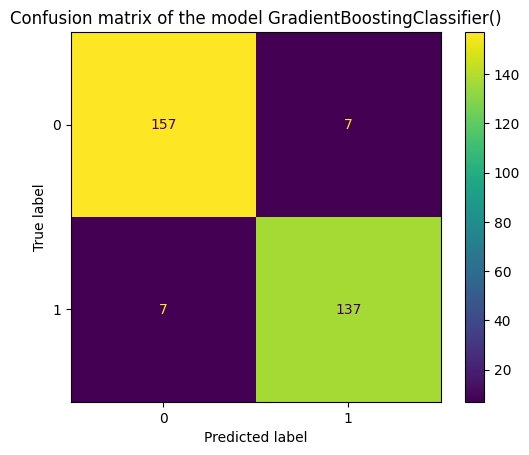

In [44]:
for model in models_unscaled:
  y_pred = model.predict(x_test)
  matrix = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(matrix, display_labels= model.classes_,)
  disp.plot()
  disp.ax_.set_title(f"Confusion matrix of the model {model}")

for model in models_unscaled:
  y_pred = model.predict(x_test)
  matrix = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(matrix, display_labels= model.classes_,)
  disp.plot()
  disp.ax_.set_title(f"Confusion matrix of the model {model}")

## Area under the Curve

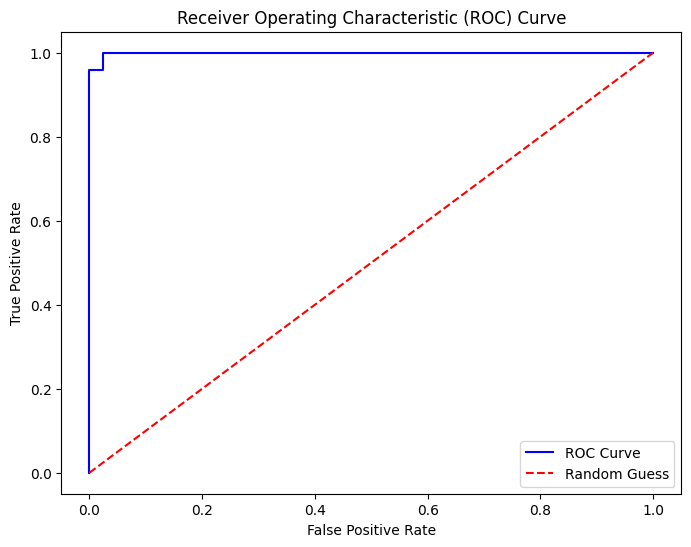

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs  = forest.predict_proba(x_test)[:, 1]
fpr, tpr , threshs = roc_curve(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [57]:
roc_auc_score(y_test, y_probs)

0.9989837398373984

## Hyper Parameter Tuning

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {
  'n_estimators': [100,200,500],
  "max_depth": [None, 10, 20, 30],
  "min_samples_split": [1,2,4],
}

In [66]:
grid_search =  GridSearchCV(forest, param_grid, cv= 3)

In [67]:
grid_search.fit(x_train, y_train)

c:\Users\21268\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
36 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\21268\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\21268\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\21268\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.p

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [1, 2, 4],
                         'n_estimators': [100, 200, 500]})

In [70]:
best_forest = grid_search.best_estimator_
best_forest

RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=500)

## Features Importances

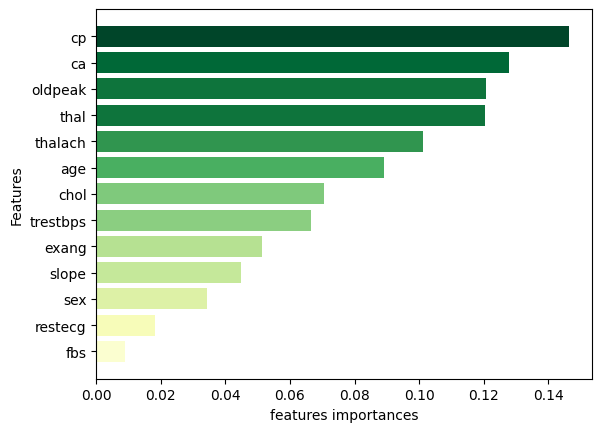

In [79]:
feature_importances = best_forest.feature_importances_
features = best_forest.feature_names_in_




sorted_idx = np.argsort(feature_importances)
sorted_features = features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]



colors = plt.cm.YlGn(sorted_importances / max(sorted_importances))

plt.barh(sorted_features, sorted_importances, color = colors)
plt.xlabel('features importances')
plt.ylabel('Features')
plt.show()

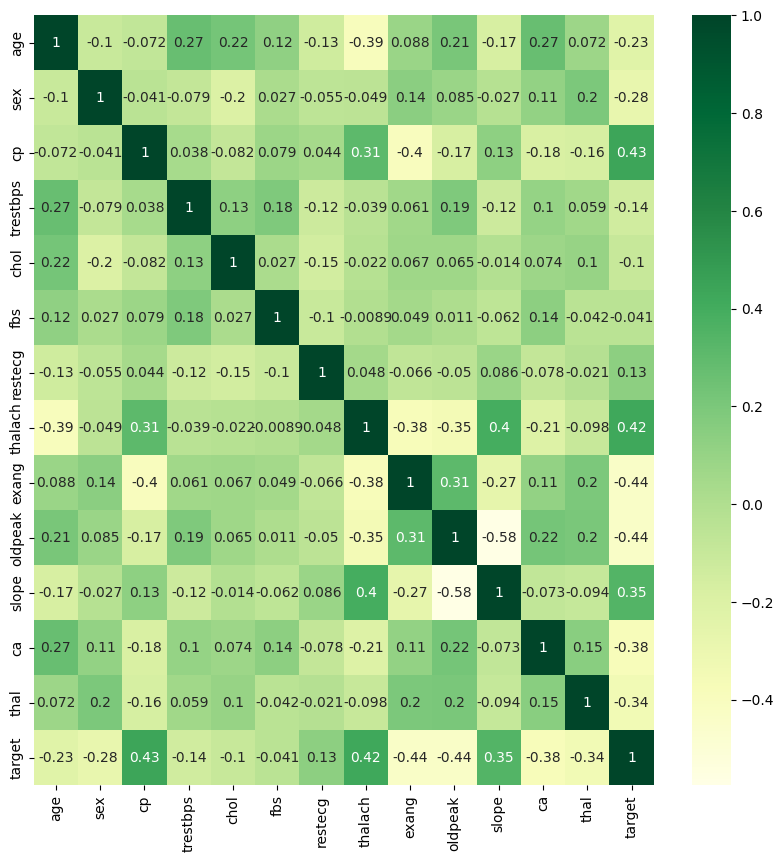

In [85]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='YlGn')
plt.show()